In [1]:
#-- Unfreez 5 Last Block --

In [2]:
#-- Imports -----------------------------------------------------------------------------------------------------
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import pickle
import os
import glob
#-----------------------------------------------------------------------------------------------------------------

In [4]:
#-- Initialize ---------------------------------------------------------------------------------------------------
input_path = '/kaggle/input/'
NUM_FOLDS = 5
#-----------------------------------------------------------------------------------------------------------------

In [5]:
#-- Function to Load All pkl files -------------------------------------------------------------------------------
def get_pkl_files(parent_folder, tag):
    pkl_files = [] 
    
    for folder in os.listdir(parent_folder):
        folder_path = os.path.join(parent_folder, folder)        
        if os.path.isdir(folder_path):
            
            pkl_files_in_folder = glob.glob(os.path.join(folder_path, f'*{tag}*.pkl'))              
            pkl_files.extend(pkl_files_in_folder)
    
    return pkl_files
#-----------------------------------------------------------------------------------------------------------------

In [6]:
#-- Load Results from Pkl Files ----------------------------------------------------------------------------------
train_metrics_files = get_pkl_files(input_path, tag='train')
val_metrics_files= get_pkl_files(input_path, tag='val')
test_metrics_files = get_pkl_files(input_path, tag='test')
#-----------------------------------------------------------------------------------------------------------------

In [7]:
print(len(train_metrics_files))
print(len(val_metrics_files))
print(len(test_metrics_files))

5
5
5


In [9]:
#-- Function to Load and Calculate Final Results ----------------------------------------------------------------
def calculate_final_metrics(metrics_files, tag):
    
    accuracy_list = []
    precision_list = []
    recall_list = []
    f1_list = []
    confusion_matrices = []
    
    best_acc = 0
    best_fold = 0
    
    for file in metrics_files:            
        with open(file, 'rb') as f:
            metrics = pickle.load(f)


        #print(metrics)
        acc = metrics[f'{tag}_acc']
        precision = metrics[f'{tag}_precision']
        recall = metrics[f'{tag}_recall']
        f1 = metrics[f'{tag}_f1']
        cm = metrics[f'{tag}_cm']

        accuracy_list.append(acc)
        precision_list.append(precision)
        recall_list.append(recall)
        f1_list.append(f1)
        confusion_matrices.append(cm)
        
        if acc> best_acc:
            best_acc = acc
            index = file.rfind('/')
            best_fold = int(file[index+1])

    #-- Calculate mean of the metrics over all folds --
    mean_accuracy = np.mean(accuracy_list)
    mean_precision = np.mean(precision_list)
    mean_recall = np.mean(recall_list)
    mean_f1 = np.mean(f1_list)

    #-- Combine confusion matrices (element-wise sum) --
    combined_cm = np.sum(confusion_matrices, axis=0)

    #--- Print final averaged metrics --
    print("\nFinal Metrics (Averaged over all folds):")
    print(f"Mean Accuracy: {mean_accuracy:.4f}")
    print(f"Mean Precision: {mean_precision:.4f}")
    print(f"Mean Recall: {mean_recall:.4f}")
    print(f"Mean F1 Score: {mean_f1:.4f}")

    #-- Plot combined confusion matrix --
    plt.figure(figsize=(3, 2))
    sns.heatmap(combined_cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Fight', 'Normal'], yticklabels=['Fight', 'Normal'],
                cbar= False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'{tag} Combined Confusion Matrix')
    plt.show()
    
    print(f'=== Best ACC = {best_acc} in Fold {best_fold} ===')

    


Final Metrics (Averaged over all folds):
Mean Accuracy: 0.9971
Mean Precision: 0.9966
Mean Recall: 0.9976
Mean F1 Score: 0.9971


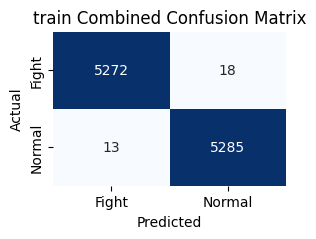

=== Best ACC = 0.9985835694050992 in Fold 3 ===


In [10]:
calculate_final_metrics(train_metrics_files, tag='train')


Final Metrics (Averaged over all folds):
Mean Accuracy: 0.9551
Mean Precision: 0.9554
Mean Recall: 0.9544
Mean F1 Score: 0.9548


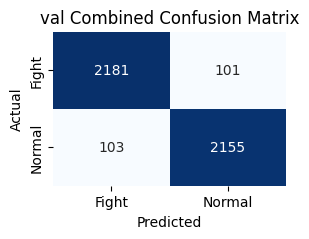

=== Best ACC = 0.9625550660792952 in Fold 4 ===


In [11]:
calculate_final_metrics(val_metrics_files, tag='val')


Final Metrics (Averaged over all folds):
Mean Accuracy: 0.9519
Mean Precision: 0.9541
Mean Recall: 0.9490
Mean F1 Score: 0.9515


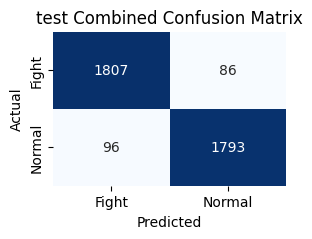

=== Best ACC = 0.9616402116402116 in Fold 3 ===


In [12]:
calculate_final_metrics(test_metrics_files, tag='test')